In [5]:
import pandas as pd

# Load data
df = pd.read_csv("MortalityDataset.csv")

# Convert numeric columns
numeric_cols = ["AGE", "HEIGHT", "WEIGHT", "CHOL"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Standardize text columns
df["MORT"] = df["MORT"].str.strip().str.lower()

# Map mortality to numeric
df["MORT_NUM"] = df["MORT"].map({
    "alive": 0,
    "dead": 1
})

# Drop invalid rows
df_clean = df.dropna(subset=["AGE", "HEIGHT", "WEIGHT", "CHOL", "MORT_NUM"])

# Verify
print(df_clean["MORT_NUM"].value_counts())


MORT_NUM
0    176
1     24
Name: count, dtype: int64


In [6]:
alive = df_clean[df_clean["MORT_NUM"] == 0]
notalive = df_clean[df_clean["MORT_NUM"] == 1]

print("Alive rows:", len(alive))
print("Not Alive rows:", len(notalive))


Alive rows: 176
Not Alive rows: 24


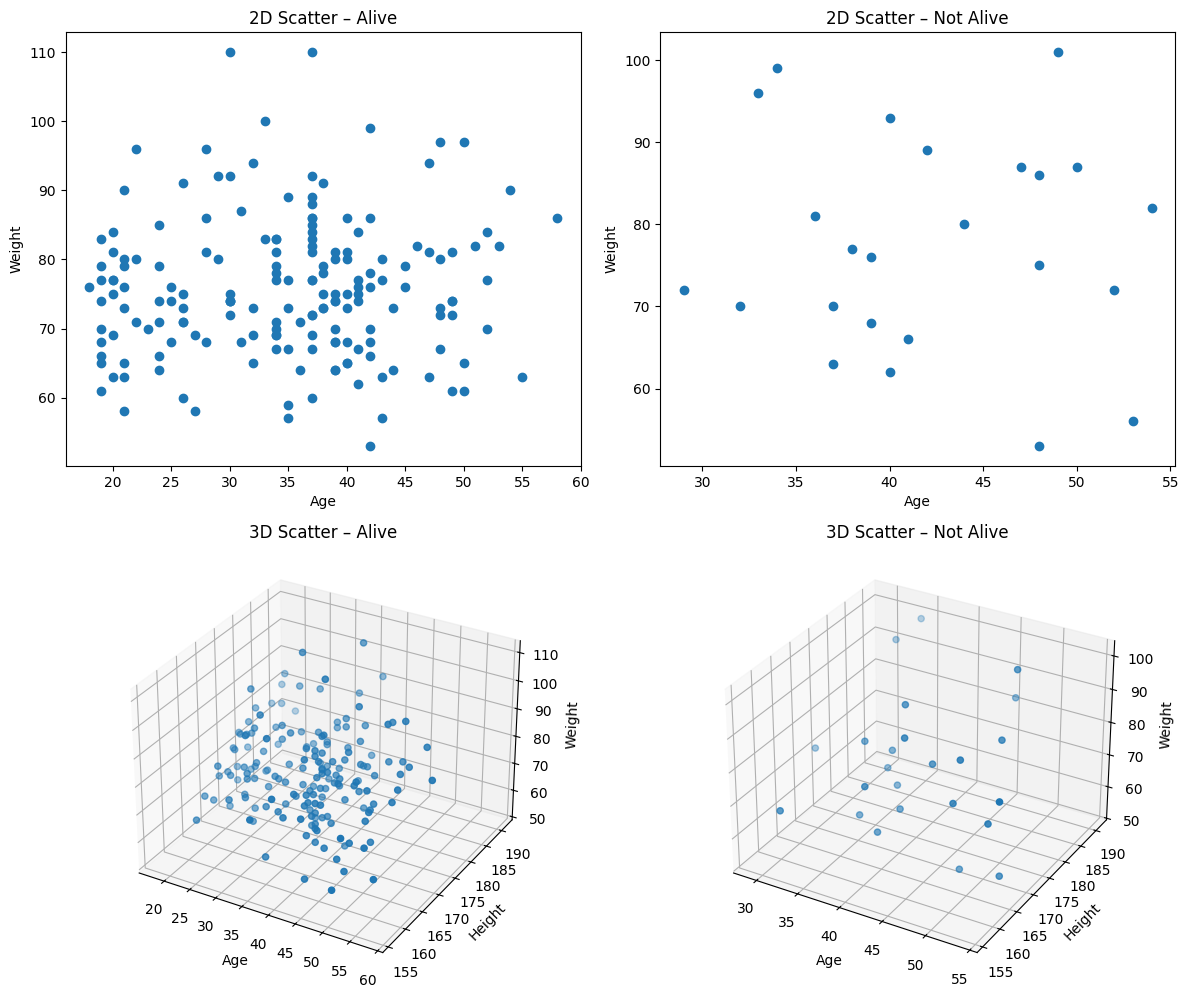

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))

# 2D Scatter – Alive
plt.subplot(2, 2, 1)
plt.scatter(alive["AGE"], alive["WEIGHT"])
plt.title("2D Scatter – Alive")
plt.xlabel("Age")
plt.ylabel("Weight")

# 2D Scatter – Not Alive
plt.subplot(2, 2, 2)
plt.scatter(notalive["AGE"], notalive["WEIGHT"])
plt.title("2D Scatter – Not Alive")
plt.xlabel("Age")
plt.ylabel("Weight")

# 3D Scatter – Alive
ax = fig.add_subplot(2, 2, 3, projection="3d")
ax.scatter(alive["AGE"], alive["HEIGHT"], alive["WEIGHT"])
ax.set_title("3D Scatter – Alive")
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")

# 3D Scatter – Not Alive
ax = fig.add_subplot(2, 2, 4, projection="3d")
ax.scatter(notalive["AGE"], notalive["HEIGHT"], notalive["WEIGHT"])
ax.set_title("3D Scatter – Not Alive")
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")

plt.tight_layout()
plt.show()


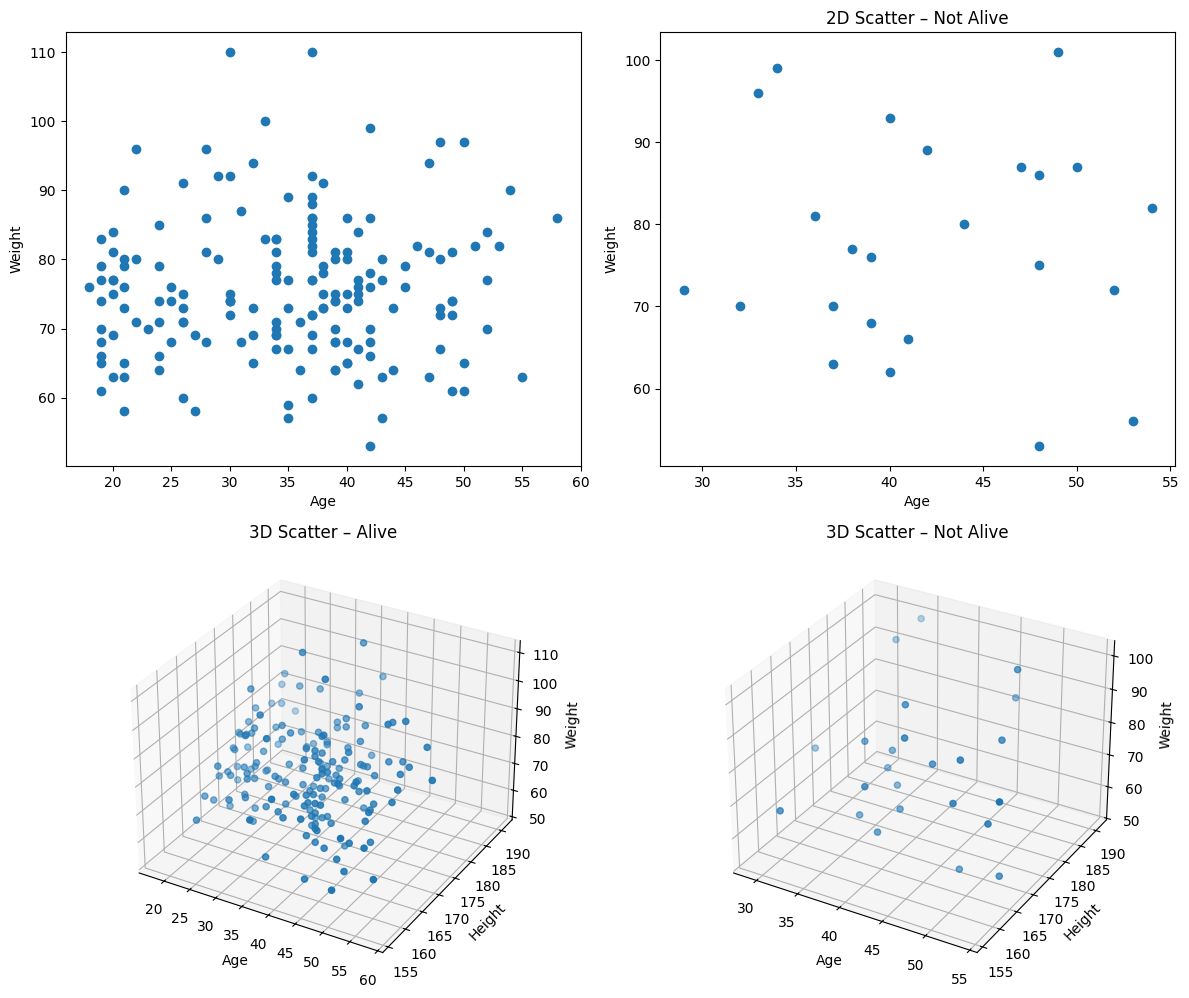

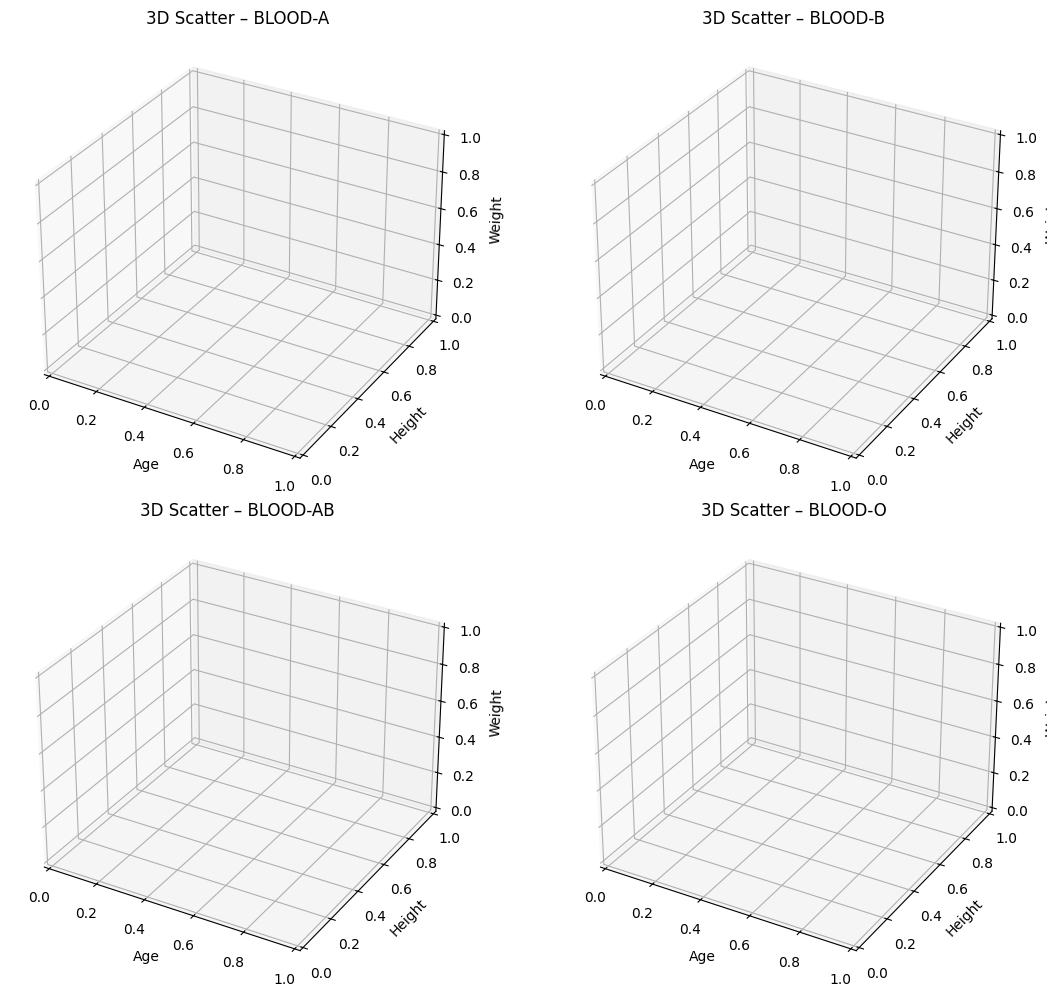

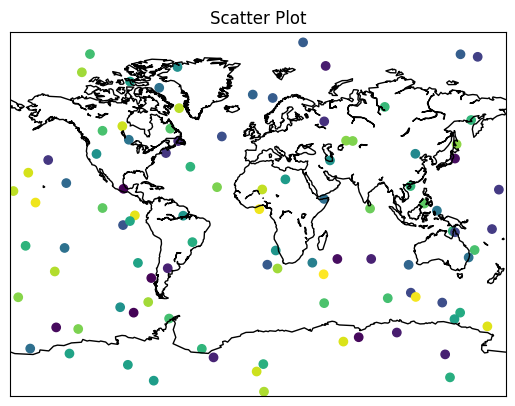

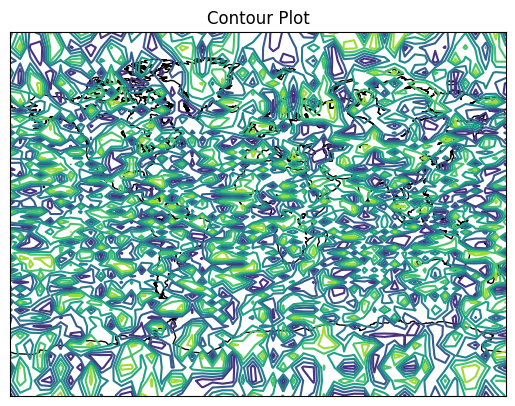

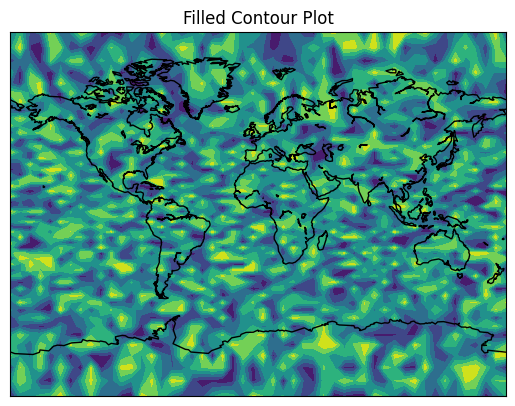

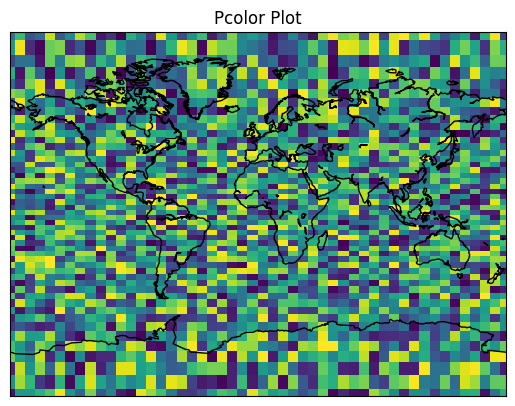

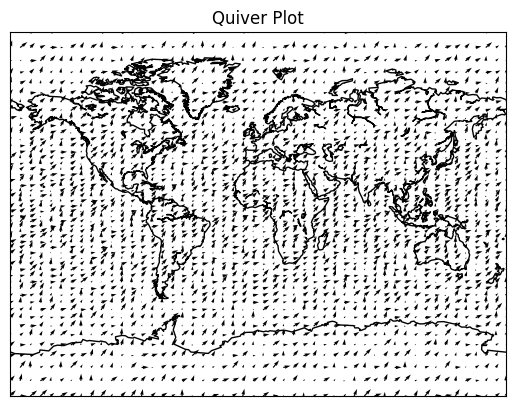

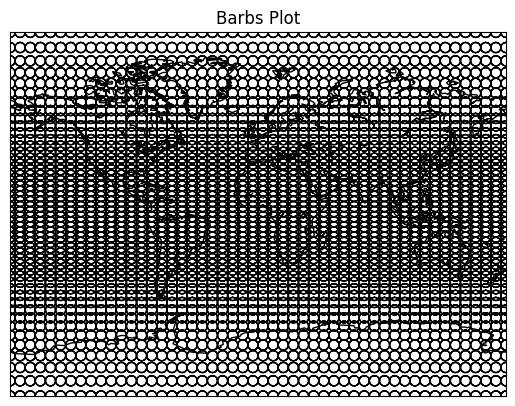

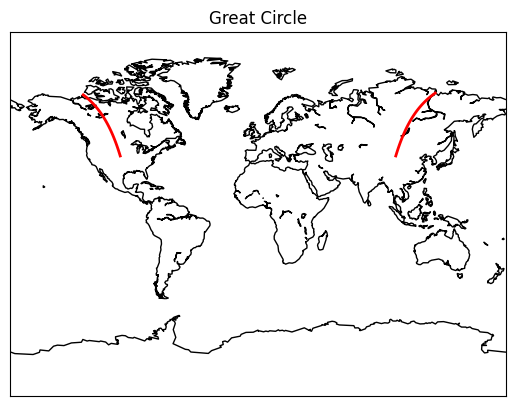

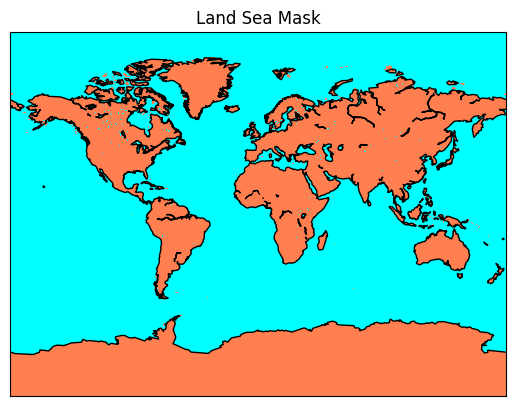

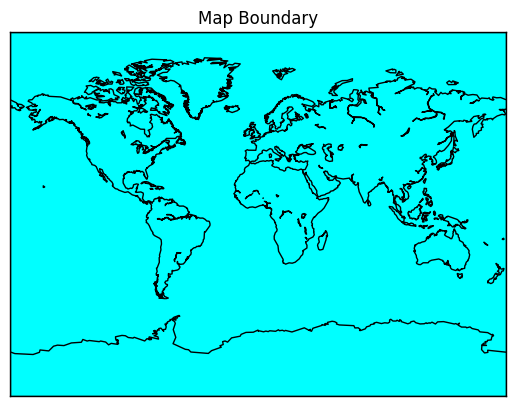

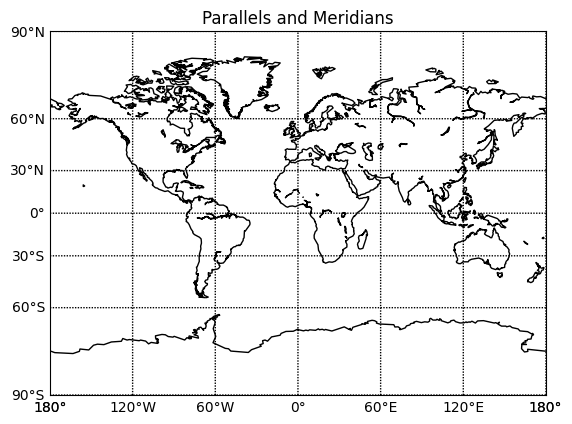

In [11]:
# Task 2: Generate an image of four scatter plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import numpy as np
fig = plt.figure(figsize=(12, 10))

# 2D Scatter – Alive
plt.subplot(2, 2, 1)
plt.scatter(alive["AGE"], alive["WEIGHT"])
plt.title

("2D Scatter – Alive")
plt.xlabel("Age")
plt.ylabel("Weight")

# 2D Scatter – Not Alive
plt.subplot(2, 2, 2)
plt.scatter(notalive["AGE"], notalive["WEIGHT"])
plt.title("2D Scatter – Not Alive")
plt.xlabel("Age")
plt.ylabel("Weight")

# 3D Scatter – Alive
ax = fig.add_subplot(2, 2, 3, projection="3d")
ax.scatter(alive["AGE"], alive["HEIGHT"], alive["WEIGHT"])
ax.set_title("3D Scatter – Alive")
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")

# 3D Scatter – Not Alive
ax = fig.add_subplot(2, 2, 4, projection="3d")
ax.scatter(notalive["AGE"], notalive["HEIGHT"], notalive["WEIGHT"])
ax.set_title("3D Scatter – Not Alive")
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")

plt.tight_layout()
plt.show()

# Task 3: Generate an image of four 3D scatter plots for blood types
blood_a = df_clean[df_clean["BLOOD"] == "A"]
blood_b = df_clean[df_clean["BLOOD"] == "B"]
blood_ab = df_clean[df_clean["BLOOD"] == "AB"]
blood_o = df_clean[df_clean["BLOOD"] == "O"]

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2, 2, 1, projection="3d")
ax.scatter(blood_a["AGE"], blood_a["HEIGHT"], blood_a["WEIGHT"])
ax.set_title("3D Scatter – BLOOD-A")
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")

ax = fig.add_subplot(2, 2, 2, projection="3d")
ax.scatter(blood_b["AGE"], blood_b["HEIGHT"], blood_b["WEIGHT"])
ax.set_title("3D Scatter – BLOOD-B")
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")

ax = fig.add_subplot(2, 2, 3, projection="3d")
ax.scatter(blood_ab["AGE"], blood_ab["HEIGHT"], blood_ab["WEIGHT"])
ax.set_title("3D Scatter – BLOOD-AB")
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")

ax = fig.add_subplot(2, 2, 4, projection="3d")
ax.scatter(blood_o["AGE"], blood_o["HEIGHT"], blood_o["WEIGHT"])
ax.set_title("3D Scatter – BLOOD-O")
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")

plt.tight_layout()
plt.show()

# Task 4: Explore Basemap and draw 10 types of plots using unique functions

# Generate sample data
np.random.seed(42)
lat = np.random.uniform(-90, 90, 100)
lon = np.random.uniform(-180, 180, 100)
data = np.random.rand(100)
lon2d, lat2d = np.meshgrid(np.linspace(-180, 180, 50), np.linspace(-90, 90, 50))
data2d = np.random.rand(50, 50)
u = np.random.rand(50, 50)
v = np.random.rand(50, 50)

# Plot 1: scatter
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.scatter(lon, lat, c=data, latlon=True)
plt.title('Scatter Plot')
plt.show()

# Plot 2: contour
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.contour(lon2d, lat2d, data2d, latlon=True)
plt.title('Contour Plot')
plt.show()

# Plot 3: contourf
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.contourf(lon2d, lat2d, data2d, latlon=True)
plt.title('Filled Contour Plot')
plt.show()

# Plot 4: pcolor
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.pcolor(lon2d, lat2d, data2d, latlon=True)
plt.title('Pcolor Plot')
plt.show()

# Plot 5: quiver
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.quiver(lon2d, lat2d, u, v, latlon=True)
plt.title('Quiver Plot')
plt.show()

# Plot 6: barbs
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.barbs(lon2d, lat2d, u, v, latlon=True)
plt.title('Barbs Plot')
plt.show()

# Plot 7: drawgreatcircle
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.drawgreatcircle(-100, 40, 100, 40, linewidth=2, color='r')
plt.title('Great Circle')
plt.show()

# Plot 8: drawlsmask
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
mask = m.drawlsmask(land_color='coral', ocean_color='aqua', lakes=True)
plt.title('Land Sea Mask')
plt.show()

# Plot 9: drawmapboundary
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
plt.title('Map Boundary')
plt.show()

# Plot 10: drawparallels and drawmeridians
plt.figure()
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.drawparallels(np.arange(-90,91,30), labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,181,60), labels=[0,0,0,1])
plt.title('Parallels and Meridians')
plt.show()